<a href="https://colab.research.google.com/github/buriro-ezekia/Financial-Analysis/blob/main/Buriro_Financial_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read data in Pandas

import pandas as pd

# Read a CSV file
# df = pd.read_csv('data.csv')

# Read a JSON file
# df = pd.read_json('data.json')

# Read an Excel file
df = pd.read_excel('/content/MakerCo Assumptions Transposed.xlsx')


In [ ]:
print(df)

   Year  Revenue Growth  Costs as % of Revenues  Inventories as % of Costs  \
0  2021            0.00                    0.00                       0.00   
1  2022            0.00                    0.00                       0.00   
2  2023            0.00                    0.00                       0.00   
3  2024            0.12                    0.60                       0.35   
4  2025            0.12                    0.58                       0.34   
5  2026            0.15                    0.00                       0.33   

   Change in Long-term Debt  Cash Balance  Revenues      COGS  Net Income  \
0                         0             0  25000000  15000000     3500000   
1                         0             0  27500000  15950000     4000000   
2                         0             0  30000000  16800000     4500000   
3                   1000000       3500000  33600000  20160000     5000000   
4                   1000000       4000000  37632000  21826560     55

In [ ]:
df.columns

Index(['Year', 'Revenue Growth', 'Costs as % of Revenues',
       'Inventories as % of Costs', 'Change in Long-term Debt', 'Cash Balance',
       'Revenues', 'COGS', 'Net Income', 'Cash', 'Inventories', 'Total Assets',
       'Long-term Debt', 'Total Liabilities', 'Equity',
       'Total Liabilities and Equity'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/MakerCo Assumptions Transposed.xlsx')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)




Missing Values:
 Year                            0
Revenue Growth                  0
Costs as % of Revenues          0
Inventories as % of Costs       0
Change in Long-term Debt        0
Cash Balance                    0
Revenues                        0
COGS                            0
Net Income                      0
Cash                            0
Inventories                     0
Total Assets                    0
Long-term Debt                  0
Total Liabilities               0
Equity                          0
Total Liabilities and Equity    0
dtype: int64


In [ ]:
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               Year  Revenue Growth  Costs as % of Revenues  \
count     6.000000        6.000000                6.000000   
mean   2023.500000        0.065000                0.196667   
std       1.870829        0.072042                0.304740   
min    2021.000000        0.000000                0.000000   
25%    2022.250000        0.000000                0.000000   
50%    2023.500000        0.060000                0.000000   
75%    2024.750000        0.120000                0.435000   
max    2026.000000        0.150000                0.600000   

       Inventories as % of Costs  Change in Long-term Debt  Cash Balance  \
count                   6.000000                  6.000000  6.000000e+00   
mean                    0.170000             500000.000000  2.000000e+06   
std                     0.186333             547722.557505  2.213594e+06   
min                     0.000000                  0.000000  0.000000e+00   
25%                     0.000000        

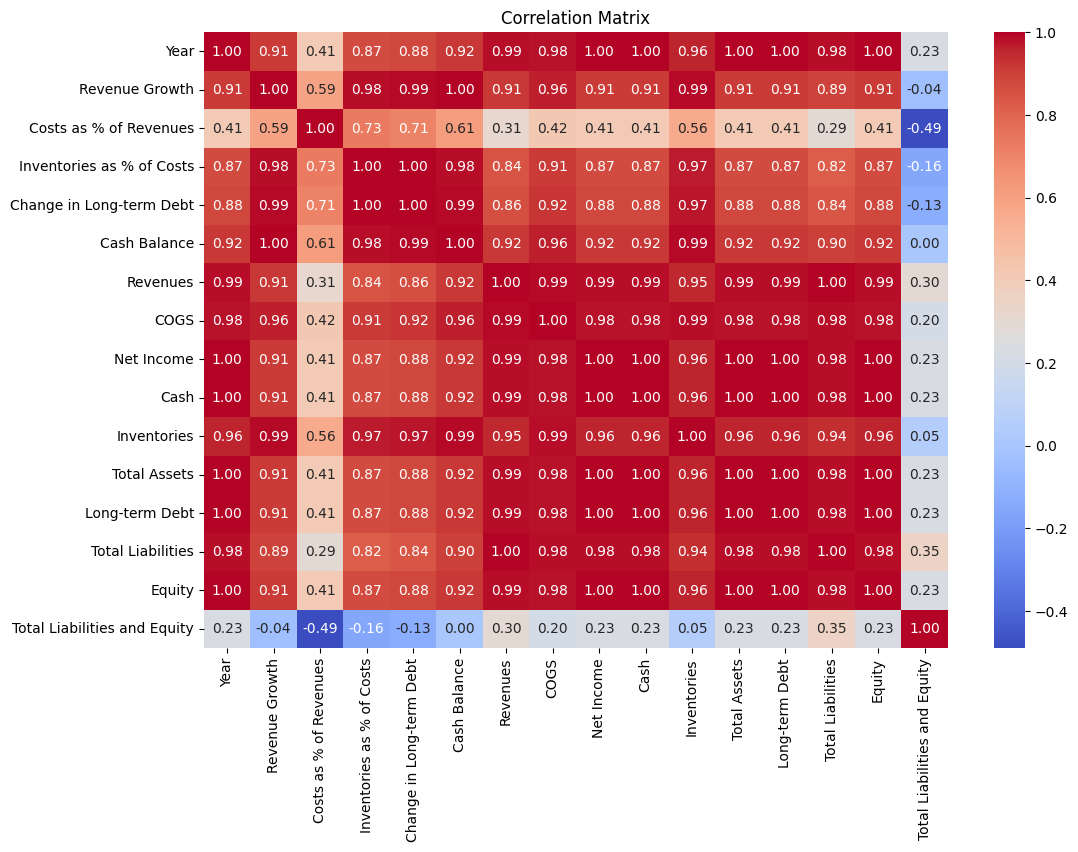

In [ ]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

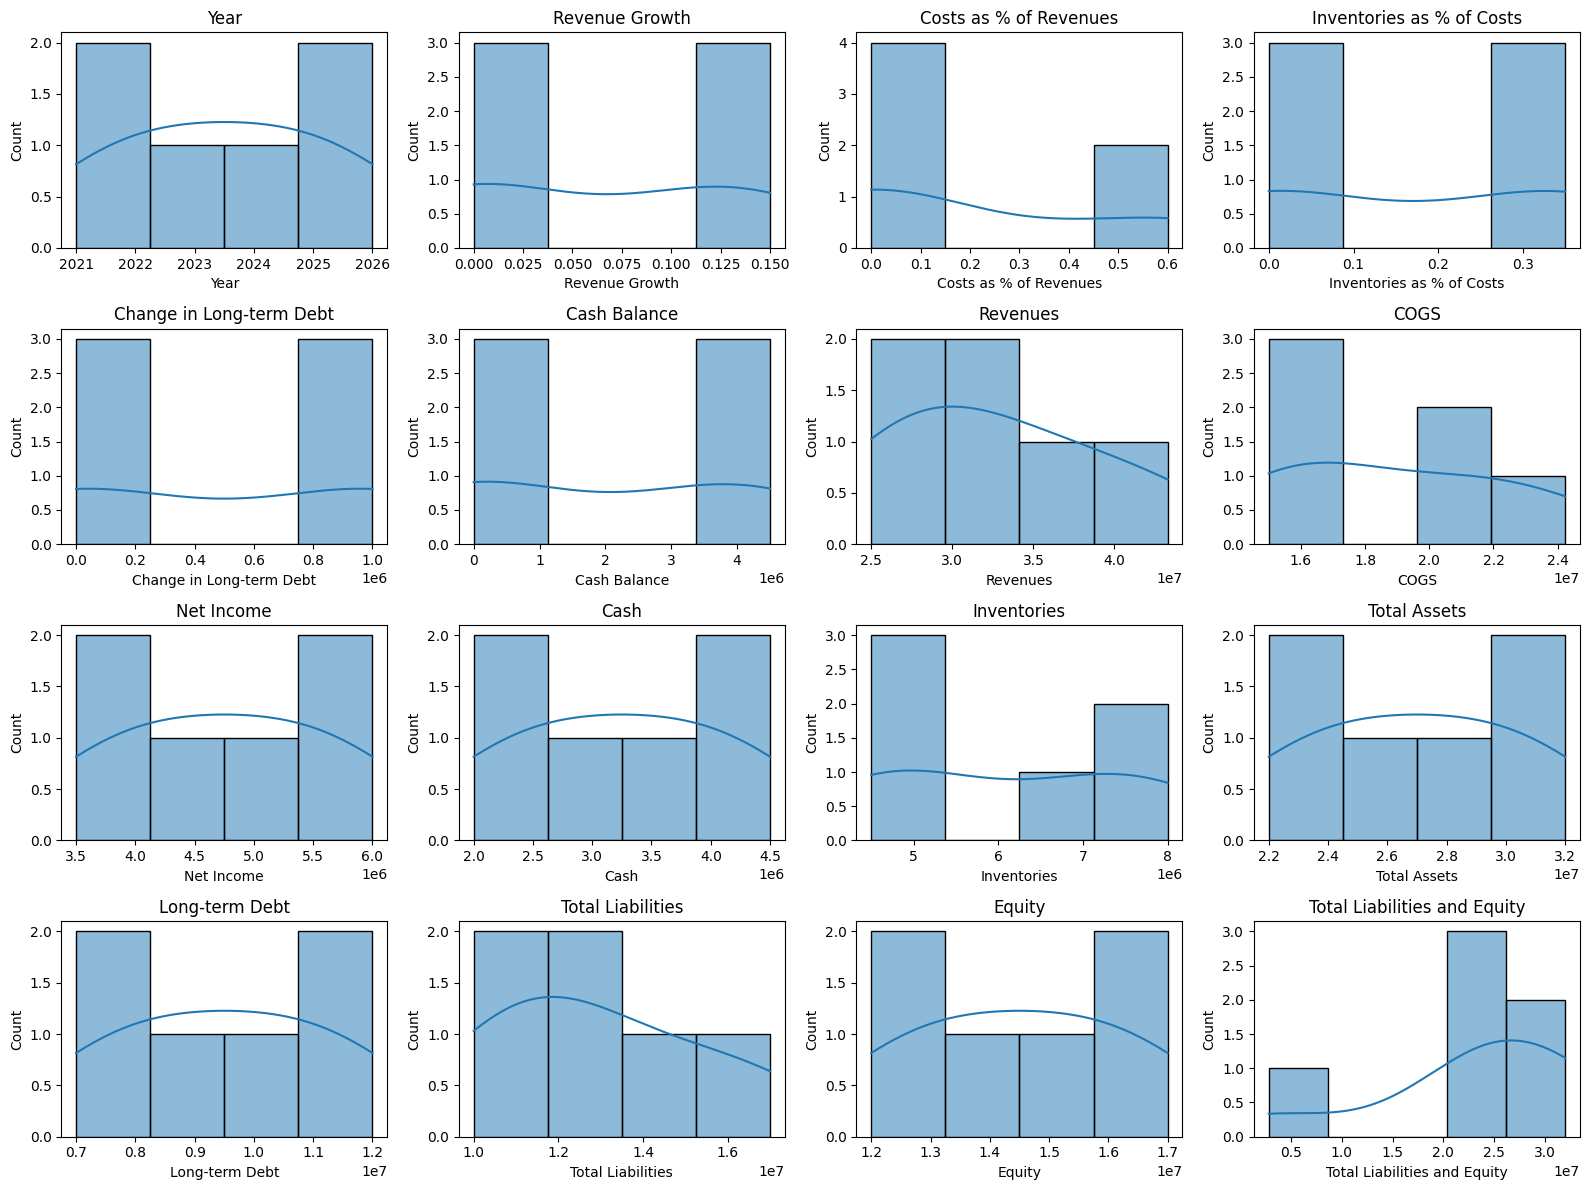

In [ ]:

# Distribution of variables
plt.figure(figsize=(16, 12))
for i, col in enumerate(data.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


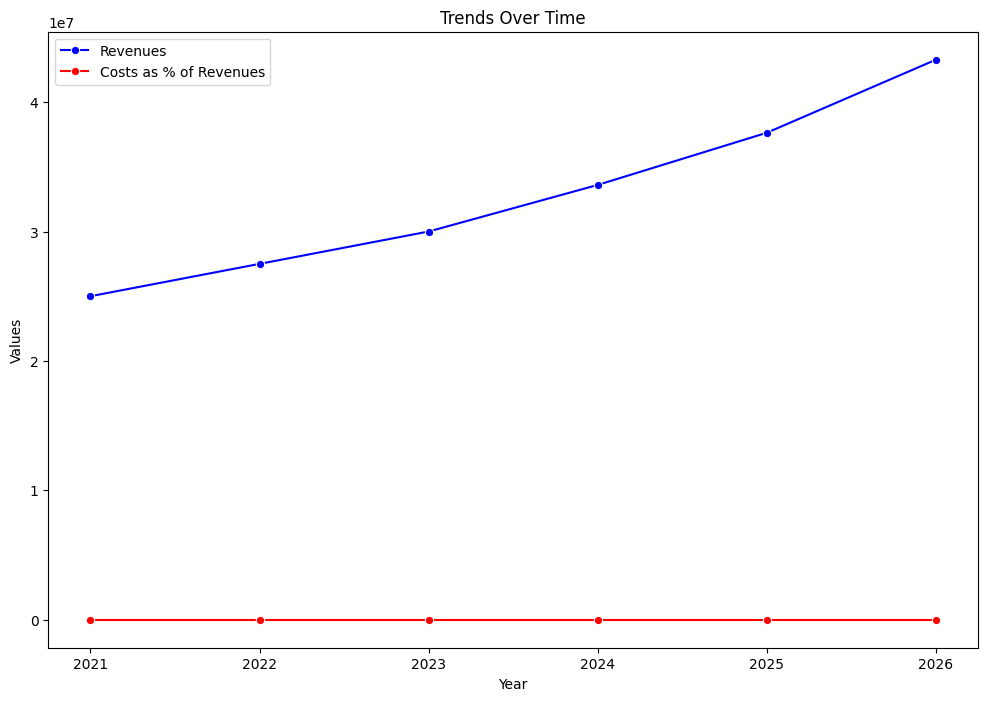

In [ ]:
# Trends over time
if 'Year' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Year', y='Revenues', data=data, marker='o', color='blue', label='Revenues')
    sns.lineplot(x='Year', y='Costs as % of Revenues', data=data, marker='o', color='red', label='Costs as % of Revenues')
    # Add more lines for other variables if needed
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.title('Trends Over Time')
    plt.legend()
    plt.show()

# Creating a dashboard using Plotly and Dash

In [ ]:
# Install the required libraries

# !pip install dash plotly pyngrok



In [ ]:
# Authenticate ngrok

from pyngrok import ngrok

# Replace 'your_ngrok_token' with your actual ngrok authentication token
ngrok.set_auth_token('2gjtoovfRj2Ksnz5fDr3QrIaMLb_3VsGTgMfJmFLKUxZyGVcE')


In [ ]:
# Step 1: Import libraries and load the data

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html

# Load the dataset
# data = pd.read_csv('your_dataset.csv')

# Make sure to replace 'your_dataset.csv' with the actual path to your dataset.


In [ ]:
# Step 2: Create visualizations

# Ensure that 'Year' column is treated as a string if it is not already
data['Year'] = data['Year'].astype(str)

# Example visualizations

fig_revenue_growth = px.line(data, x='Year', y='Revenue Growth', title='Revenue Growth Over Years')
fig_costs_percentage = px.line(data, x='Year', y='Costs as % of Revenues', title='Costs as % of Revenues Over Years')
fig_inventory_costs = px.line(data, x='Year', y='Inventories as % of Costs', title='Inventories as % of Costs Over Years')
fig_long_term_debt = px.line(data, x='Year', y='Change in Long-term Debt', title='Change in Long-term Debt Over Years')

# Scatter plot for Revenues vs. Net Income
fig_revenue_vs_income = px.scatter(data, x='Revenues', y='Net Income', title='Revenues vs. Net Income')

# Bar chart for Total Assets and Total Liabilities
fig_assets_liabilities = go.Figure()
fig_assets_liabilities.add_trace(go.Bar(x=data['Year'], y=data['Total Assets'], name='Total Assets'))
fig_assets_liabilities.add_trace(go.Bar(x=data['Year'], y=data['Total Liabilities'], name='Total Liabilities'))
fig_assets_liabilities.update_layout(barmode='group', title='Total Assets vs. Total Liabilities')


In [ ]:
# Step 3: Create the Dash application

app = Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Financial Dashboard'),

    html.Div(children='''
        An interactive dashboard to visualize financial data.
    '''),

    dcc.Graph(
        id='revenue-growth',
        figure=fig_revenue_growth
    ),

    dcc.Graph(
        id='costs-percentage',
        figure=fig_costs_percentage
    ),

    dcc.Graph(
        id='inventory-costs',
        figure=fig_inventory_costs
    ),

    dcc.Graph(
        id='long-term-debt',
        figure=fig_long_term_debt
    ),

    dcc.Graph(
        id='revenue-vs-income',
        figure=fig_revenue_vs_income
    ),

    dcc.Graph(
        id='assets-liabilities',
        figure=fig_assets_liabilities
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
# !pip install --upgrade pyngrok

In [ ]:
# # Step 4: Run the application and expose it using ngrok
# import subprocess
# import os

# # Start ngrok background process
# ngrok_proc = subprocess.Popen(['ngrok', 'http', '8050'])

# # Get ngrok url
# ngrok_url = None
# while True:
#     ngrok_cmd = subprocess.run(['curl', 'http://localhost:4040/api/tunnels'], stdout=subprocess.PIPE)
#     ngrok_output = ngrok_cmd.stdout.decode()
#     if '"public_url"' in ngrok_output:
#         ngrok_url = ngrok_output.split('"public_url": "')[1].split('",')[0]
#         break

# print("Ngrok URL:", ngrok_url)

# # Run the Dash app
# app.run_server(debug=False, port=8050, host='localhost', mode='external')

# # Cleanup: Terminate ngrok process
# ngrok_proc.terminate()